In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

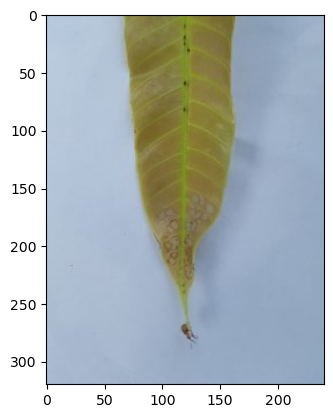

In [2]:
img = cv2.imread('mango_dataset/Anthracnose/20211008_124249 (Custom).jpg',)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [3]:
vectorized=img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [5]:
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)


In [6]:
center = np.uint8(center)

In [7]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))
colors= center.flatten()

In [8]:
colors

array([152, 171, 195, 127, 119,  54, 175, 191, 212, 141, 157, 175, 139,
       133,  80], dtype=uint8)

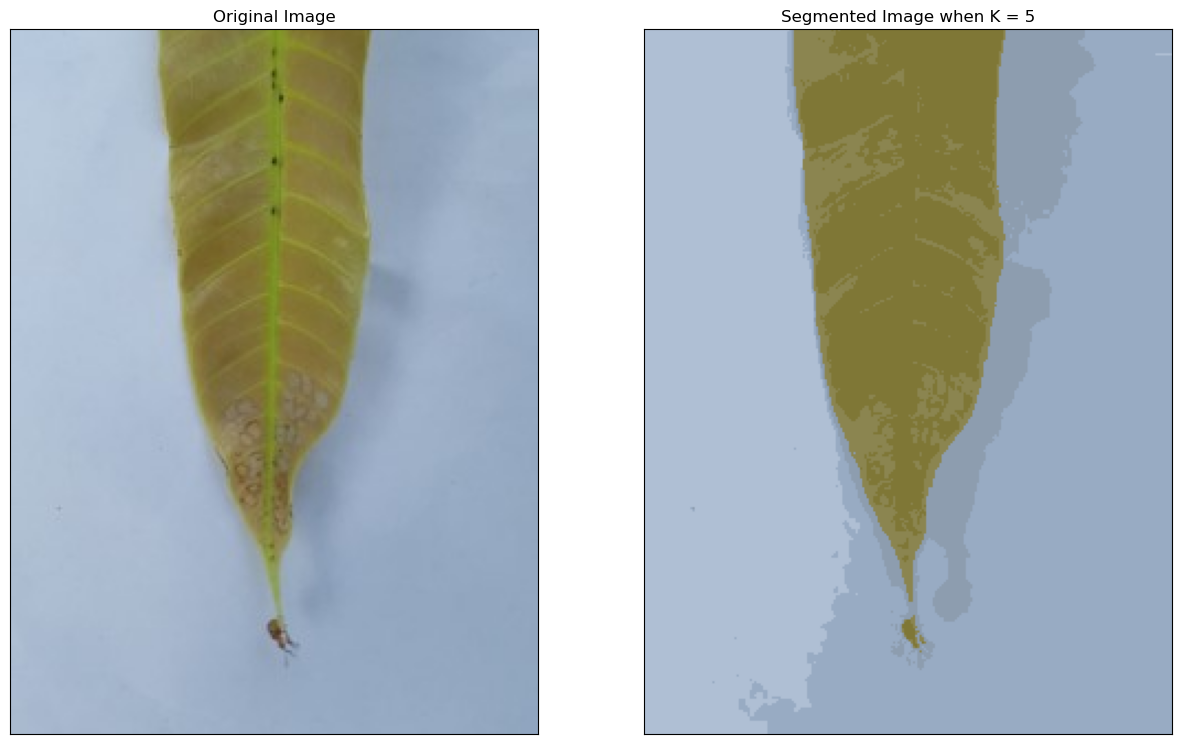

In [9]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

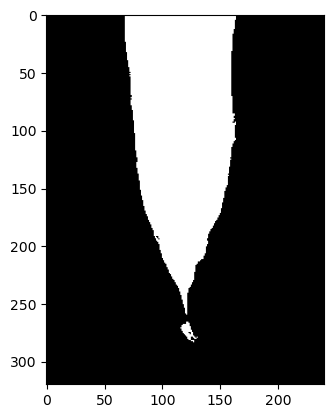

In [10]:
gray_img=np.invert(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

_, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_img,"gray")

In [11]:
def DCD(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1, 3))
    vectorized = np.float32(vectorized)
    K = 5
    attempts = 10
    ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    colors = center.flatten()
    colors = colors[:7]
    
    return colors
    
def fouriers(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=cv2.contourArea)
    boundary_points = contour[:, 0, :]
    complex_boundary = boundary_points[:, 0] + 1j * boundary_points[:, 1]
    descriptors = np.fft.fft(complex_boundary)
    descriptors[0] = 0
    descriptors /= np.abs(descriptors[1])
    magnitudes = np.abs(descriptors)
    index=np.argsort(magnitudes)[-10:]
    sigCoef=magnitudes[index]
    
   

    return  sigCoef




In [12]:
def charExtractor(folderPath, leafclass):
    data = []
    for filename in os.listdir(folderPath):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folderPath, filename)
            colors = DCD(img_path)
            mag = fouriers(img_path)
            char = np.concatenate((colors, mag, [leafclass]))
            data.append(char)
    print(leafclass, " Ready")
    return data

            
            


            



In [13]:

charAtn = charExtractor('mango_dataset/Anthracnose/', 'Anthracnose')
charAtn = charExtractor('mango_dataset/Bacterial Canker/', 'Bacterial Canke')
charWee = charExtractor('mango_dataset/Cutting Weevil/', 'Cutting Weevil')
charDie = charExtractor('mango_dataset/Die Back/', 'Die Back')
charGall = charExtractor('mango_dataset/Gall Midge/', 'Gall Midge')
charHealty = charExtractor('mango_dataset/Healthy/', 'Healthy')
charMildew= charExtractor('mango_dataset/Powdery Mildew/', 'Mildew')
charMould = charExtractor('mango_dataset/Sooty Mould/', 'Mould')

Anthracnose  Ready
Bacterial Canke  Ready
Cutting Weevil  Ready
Die Back  Ready
Gall Midge  Ready
Healthy  Ready
Mildew  Ready
Mould  Ready


In [14]:
colums=[f'c_{i}' for i in range(7)] + [f'm_{i}' for i in range(10)]+ ["Class"]

In [15]:
data = charAtn + charAtn + charWee + charDie + charGall + charHealty + charMildew + charMould

In [16]:
df=pd.DataFrame(data,columns=colums)

In [17]:
df

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,Class
0,138,132,80,152,171,195,175,0.38296635739662416,0.4377700719651615,0.5195789541626596,0.5216739615152823,0.6522837465132961,1.0,1.4212685592185104,2.5698404507282735,5.136513086489621,6.210987414779291,Anthracnose
1,164,181,203,130,122,55,149,0.4218943788385441,0.4889366094922692,0.5291464083956602,0.5396472110526036,0.6221974703030299,0.9999999999999999,1.3414789666213611,2.5889037102811714,5.381486556878508,6.224737141357614,Anthracnose
2,118,109,46,150,168,192,178,0.05874953684614074,0.09126336201441161,0.09182103033042652,0.10102420793166209,0.13510848481336313,0.16203556189901142,0.2634293096278711,0.3444444545839293,1.0,2.1768808353846314,Anthracnose
3,123,140,160,169,186,207,121,0.044839607892343376,0.04946103258486042,0.0645958076050613,0.09447148157851672,0.10067420609946115,0.11056041352833397,0.11950018050068775,0.22621165766506096,1.0000000000000002,1.7900732988071661,Anthracnose
4,151,173,200,144,137,77,191,0.0280635594692209,0.034228057913826444,0.05131788359663245,0.0949858378861622,0.09500706552720264,0.13385130902811218,0.21762382952048898,0.28613676052099013,1.0,2.522150459482766,Anthracnose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,92,88,57,229,228,229,151,0.19918156493379502,0.2225296867909689,0.24316020951193995,0.252577378865375,0.3670721604567858,1.0,1.005104541002317,1.9317436707168714,3.0196404973988713,3.42318611063337,Mould
3996,38,37,21,187,185,199,102,0.04105478326308353,0.04754062262465026,0.05258466610059124,0.11077068505450563,0.12297346812972919,0.17152200257759098,0.30060251388684933,0.3058379777132316,1.0,3.047886223878592,Mould
3997,68,65,28,211,208,214,156,0.054376072143949974,0.05988992890994052,0.08037056640087985,0.12342359296184349,0.18649652132437178,0.21304896004957152,0.3053300955207724,0.4799916709039119,1.0,1.8163564797883789,Mould
3998,212,209,214,68,64,27,236,0.09058138668585228,0.09899834414679874,0.10093229102052603,0.11024723724104658,0.13776311408490785,0.14355042985507063,0.3668156845116654,0.5096801456398787,1.0,1.793680187030976,Mould


In [18]:
X=df.drop(columns=["Class"])
y=df["Class"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1997)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.685


In [22]:

rf = RandomForestClassifier(n_estimators=100, random_state=1997)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.7041666666666667
